### Exercise 01 : PyTorch workflow


1. Create a straight line dataset using the linear regression formula (weight * X + bias).
- Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
- Split the data into 80% training, 20% testing.
- Plot the training and testing data so it becomes visual.
2. Build a PyTorch model by subclassing nn.Module.
- Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
- Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
Once you've constructed the model, make an instance of it and check its state_dict().
- Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.
3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
- Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
- Write a training loop to perform the appropriate training steps for 300 epochs.
- The training loop should test the model on the test dataset every 20 epochs.
4. Make predictions with the trained model on the test data.
- Visualize these predictions against the original training and testing data 
(note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).
5. Save your trained model's state_dict() to file.
- Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.



In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt


print(torch.__version__)

2.1.1+cpu


In [2]:
#  Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.

torch.manual_seed(42)
DEBUG: bool = True
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
if DEBUG:
    print(f"There are {len(X)} data points")
y = X * weight + bias

There are 100 data points


In [3]:
# Split the data into 80% training, 20% testing.
train_split_idx = int((80 * len(X)) / 100)
X_train, y_train = X[:train_split_idx], y[:train_split_idx]
if DEBUG:
    print(X_train.shape, y_train.shape)
X_test, y_test = X[train_split_idx:], y[train_split_idx:]
if DEBUG:
    print(X_test.shape, y_test.shape)

torch.Size([80, 1]) torch.Size([80, 1])
torch.Size([20, 1]) torch.Size([20, 1])


In [4]:
#  Plot the training and testing data so it becomes visual.


def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None,
):
    plt.figure(figsize=(8, 6))

    plt.scatter(train_data, train_labels, c="magenta", s=5, label="Training data")
    plt.scatter(test_data, test_labels, c="blue", s=5, label="Testing data")

    # plot predictions
    if predictions is not None:
        plt.scatter(test_data, predictions, c="green", s=5, label="Predictions")

    plt.legend()
    plt.show()

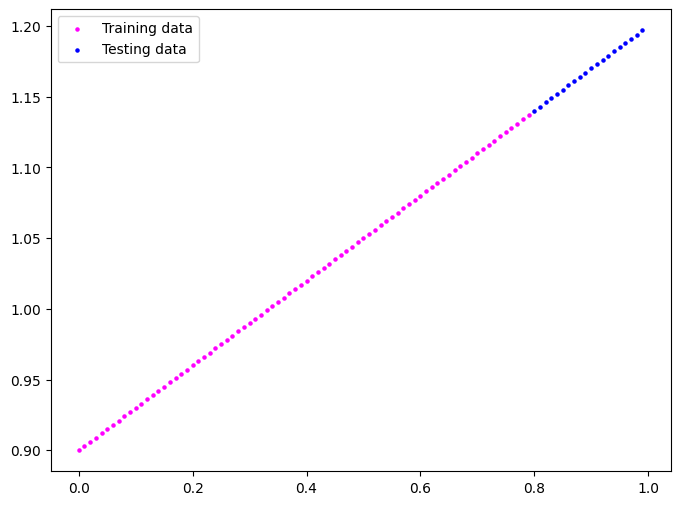

In [5]:
plot_predictions()

In [6]:
# Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.

torch.manual_seed(42)


class WLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(
            torch.randn(1, dtype=torch.float32), requires_grad=True
        )
        
        self.biais = nn.Parameter(
            torch.randn(1, dtype=torch.float32), requires_grad=True
        )

    # ALTERNATIVE with nn.Linear

    # Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.weights *x  + self.biais

In [7]:
w_model = WLinearRegressionModel()
print(w_model.state_dict())

OrderedDict([('weights', tensor([0.3367])), ('biais', tensor([0.1288]))])


In [8]:
# Create a l1 loss function and optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = w_model.parameters(), lr=0.01)

C:\Users\PC CABA DZ\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
# write the training loop for 300 epochs
epochs = 300

training_losses = []
testing_losses = []
epoch_counts =[]
    
for epoch in range(epochs):
        w_model.train()
        y_pred = w_model(X_train)
        train_loss = loss_fn(y_pred, y_train)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        w_model.eval()
        with torch.inference_mode():
            test_pred = w_model(X_test)
            test_loss = loss_fn(test_pred, y_test.type(torch.float))
            epoch_counts.append(epoch_counts)
            training_losses.append(train_loss.detach().numpy())
            testing_losses.append(test_loss.detach().numpy())
            print(
            f"Epoch : {epoch}\n\tMAE Train Loss (L1 Loss) --> {train_loss}\n\tMAE Test Loss (L1 Loss)  --> {test_loss} \n"
        )
        

Epoch : 0
	MAE Train Loss (L1 Loss) --> 0.007858465425670147
	MAE Test Loss (L1 Loss)  --> 0.007045787759125233 

Epoch : 1
	MAE Train Loss (L1 Loss) --> 0.00370177929289639
	MAE Test Loss (L1 Loss)  --> 0.006489443592727184 

Epoch : 2
	MAE Train Loss (L1 Loss) --> 0.007858465425670147
	MAE Test Loss (L1 Loss)  --> 0.007045787759125233 

Epoch : 3
	MAE Train Loss (L1 Loss) --> 0.00370177929289639
	MAE Test Loss (L1 Loss)  --> 0.006489443592727184 

Epoch : 4
	MAE Train Loss (L1 Loss) --> 0.007858465425670147
	MAE Test Loss (L1 Loss)  --> 0.007045787759125233 

Epoch : 5
	MAE Train Loss (L1 Loss) --> 0.00370177929289639
	MAE Test Loss (L1 Loss)  --> 0.006489443592727184 

Epoch : 6
	MAE Train Loss (L1 Loss) --> 0.007858465425670147
	MAE Test Loss (L1 Loss)  --> 0.007045787759125233 

Epoch : 7
	MAE Train Loss (L1 Loss) --> 0.00370177929289639
	MAE Test Loss (L1 Loss)  --> 0.006489443592727184 

Epoch : 8
	MAE Train Loss (L1 Loss) --> 0.007858465425670147
	MAE Test Loss (L1 Loss)  --> 0

In [10]:
list(w_model.parameters())

[Parameter containing:
 tensor([0.3067], requires_grad=True),
 Parameter containing:
 tensor([0.9011], requires_grad=True)]

In [11]:
# make prediciton son the test data
w_model.eval()
with torch.inference_mode():
    y_preds = w_model(X_test)
    print(y_preds)
    print(type(y_preds))

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]])
<class 'torch.Tensor'>


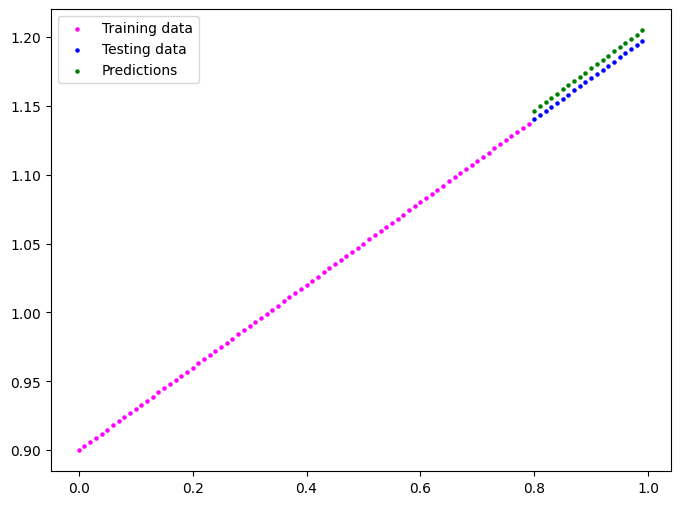

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
print(w_model.state_dict())

OrderedDict([('weights', tensor([0.3067])), ('biais', tensor([0.9011]))])


In [14]:
# save the trained model state dict
from pathlib import Path

MODEL_NAME = "00.pt_linear_regression_model_exercise.pth"
MODEL_SAVE_PATH = Path('my_models')/ MODEL_NAME

# Save the modelstate dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=w_model.state_dict(), f=MODEL_SAVE_PATH)
print("Model saved successfully !")

Saving model to : my_models\00.pt_linear_regression_model_exercise.pth
Model saved successfully !


In [15]:
# load the model
loaded_w_model = WLinearRegressionModel()
loaded_w_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [16]:
loaded_w_model.eval()
with torch.inference_mode():
    loaded_y_preds = loaded_w_model(X_test)
    print(y_preds==loaded_y_preds)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


In [27]:
w_model

WLinearRegressionModel()